In [ ]:
#from google.Ecolab import files#
#files.upload()#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls

healthcare-dataset-stroke-data.csv  sample_data


**Reading Data**

In [ ]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

**Getting information from the dataset**

In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   object 
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 479.2+ KB


**Removing unnecessarry columns from our data**

In [ ]:
stroke.drop('id',axis=1,inplace=True)

In [ ]:
stroke.shape

(5110, 11)

**Checking duplicates and removing**

In [ ]:
stroke.drop_duplicates(inplace=True)

**Dealing with null values**

In [ ]:
stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
stroke.bmi.fillna(stroke.bmi.mean(),inplace=True)

In [ ]:
stroke.bmi.isna().sum()

0

**Checking outliers and removing it**

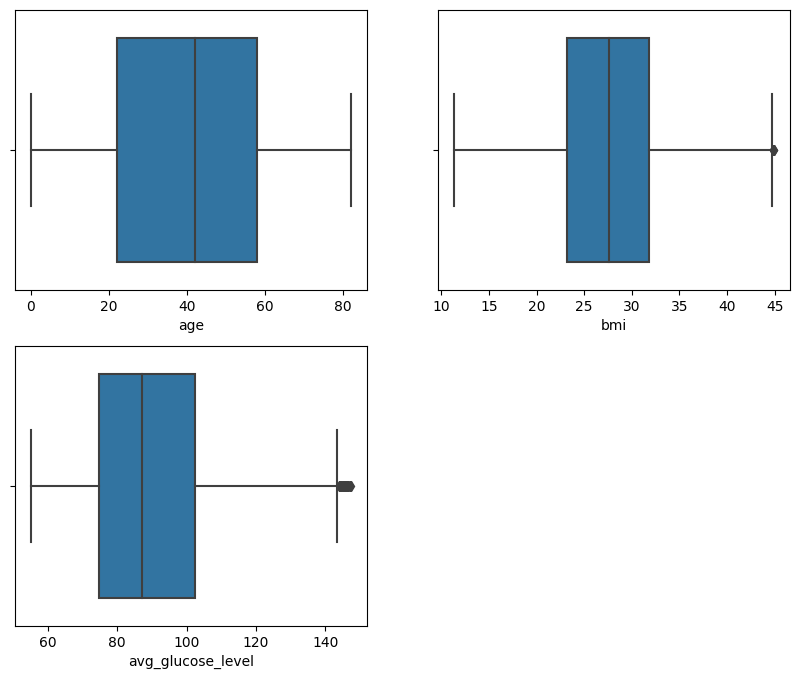

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.boxplot(x=stroke.age)

plt.subplot(2,2,2)
sns.boxplot(x=stroke.bmi)

plt.subplot(2,2,3)
sns.boxplot(x=stroke.avg_glucose_level)

plt.show()



In [ ]:
# outlier function
def remove_outliers(col_name):

  global stroke
  Q1=stroke[col_name].quantile(.25)
  Q3=stroke[col_name].quantile(.75)
  IQR=Q3-Q1

  lower=Q1 - 1.5*IQR
  upper=Q3 + 1.5*IQR

  stroke_without_outliers=stroke[(stroke[col_name]>=lower) & (stroke[col_name]<=upper)]
  stroke=stroke_without_outliers.copy()
  return stroke[col_name]


In [ ]:
remove_outliers('bmi')

2       32.500000
6       27.400000
7       22.800000
8       28.893237
9       24.200000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 4367, dtype: float64

In [ ]:
remove_outliers('avg_glucose_level')

2       105.92
6        70.09
7        94.39
8        76.15
9        58.57
         ...  
5104    103.08
5105     83.75
5106    125.20
5107     82.99
5109     85.28
Name: avg_glucose_level, Length: 4249, dtype: float64

**Data Visualization**

In [ ]:
stroke['age']=stroke.age.astype('int32')


In [ ]:
stroke['agegrp']=pd.cut(stroke.age,[0,10,20,30,40,50,60,70,80,90])

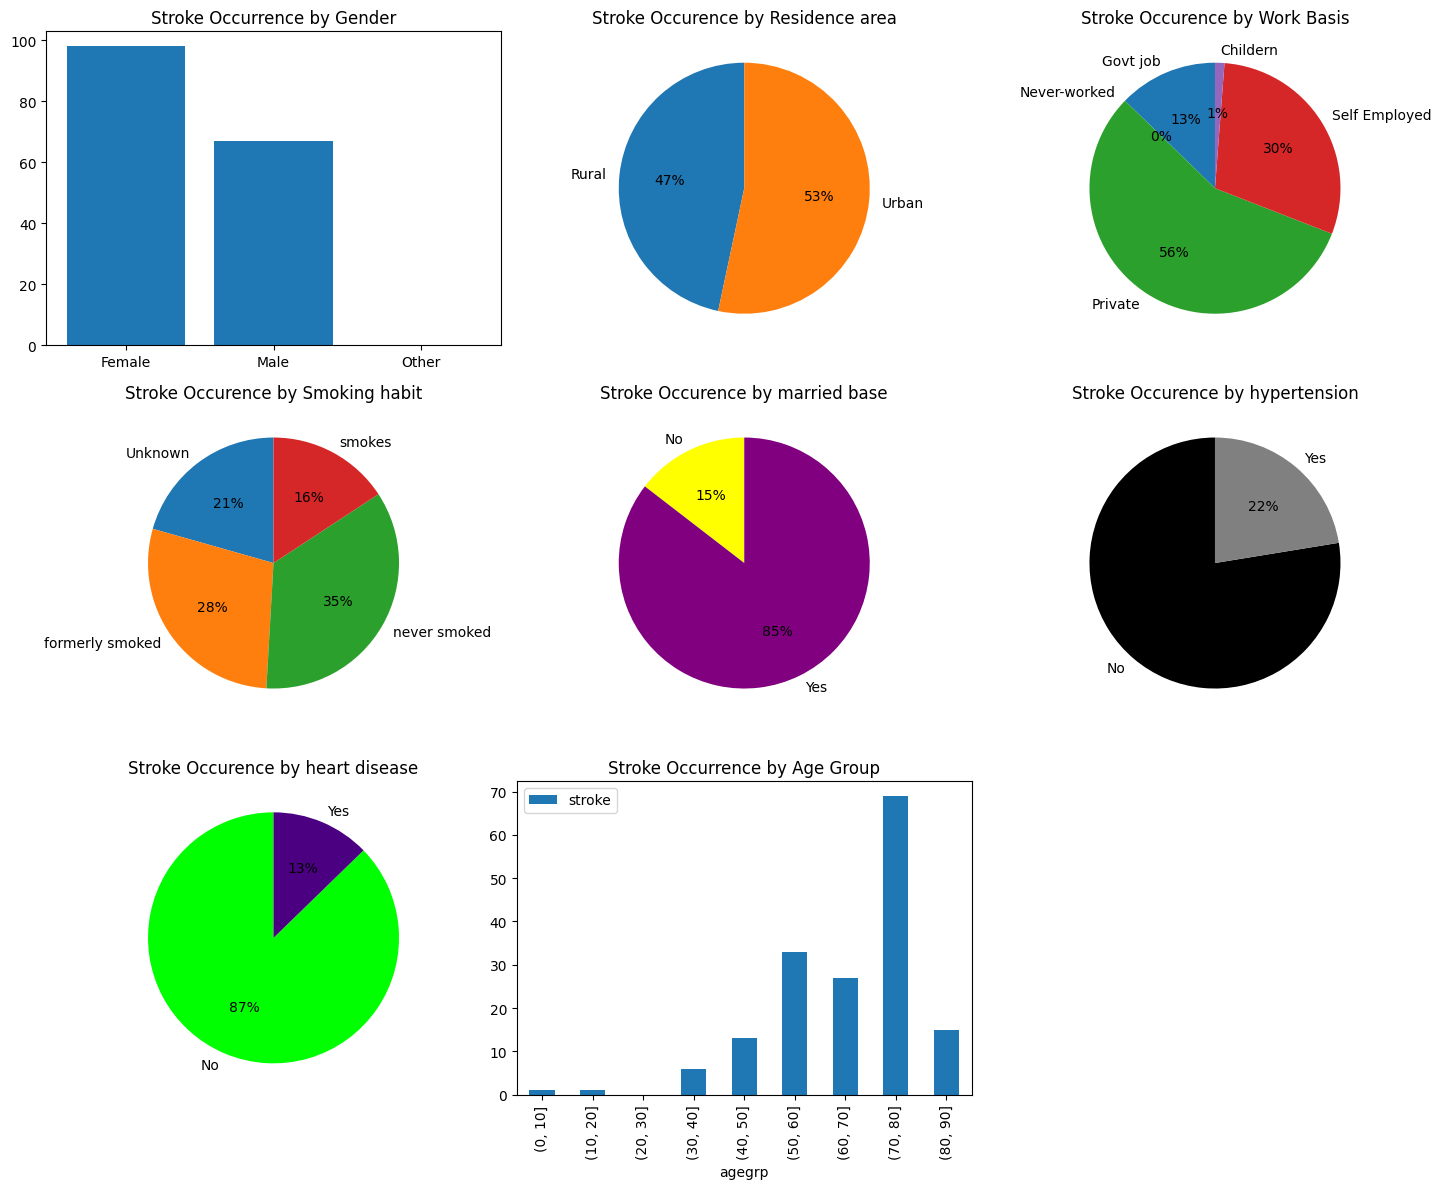

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,12))

gender_based=stroke.groupby('gender').agg({'stroke':'sum'})
ax[0][0].bar(
    gender_based.index,
    gender_based.stroke,

)
ax[0][0].set_title('Stroke Occurrence by Gender')

residence_based=stroke.groupby('Residence_type').agg({'stroke':'sum'},axis=1)
ax[0][1].pie(
    x=residence_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['Rural','Urban']
)
ax[0][1].set_title('Stroke Occurence by Residence area')

work_based=stroke.groupby('work_type').agg({'stroke':'sum'},axis=1)
ax[0][2].pie(
    x=work_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['Childern','Self Employed','Private','Never-worked','Govt job'][::-1]
)
ax[0][2].set_title('Stroke Occurence by Work Basis')

smoking_based=stroke.groupby('smoking_status').agg({'stroke':'sum'},axis=1)
ax[1][0].pie(
    x=smoking_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['Unknown','formerly smoked','never smoked','smokes']
)
ax[1][0].set_title('Stroke Occurence by Smoking habit')

married_based=stroke.groupby('ever_married').agg({'stroke':'sum'},axis=1)
ax[1][1].pie(
    x=married_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['No','Yes'],
    colors=['yellow','purple']

)
ax[1][1].set_title('Stroke Occurence by married base')

hypertension_based=stroke.groupby('hypertension').agg({'stroke':'sum'},axis=1)
ax[1][2].pie(
    x=hypertension_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['No','Yes'],
    colors=['black','gray']

)
ax[1][2].set_title('Stroke Occurence by hypertension')

heart_disease_based=stroke.groupby('heart_disease').agg({'stroke':'sum'},axis=1)
ax[2][0].pie(
    x=heart_disease_based['stroke'],
    startangle=90,
    autopct='%.0f%%',
    labels=['No','Yes'],
    colors=['lime','indigo']
)
ax[2][0].set_title('Stroke Occurence by heart disease')

stroke.groupby('agegrp').agg({'stroke': 'sum'}, axis=1).plot(kind='bar', ax=ax[2][1])
ax[2][1].set_title('Stroke Occurrence by Age Group')

ax[2][2].axis('off')

plt.tight_layout()



**Data Encoding**

In [ ]:
stroke=pd.get_dummies(data=stroke,columns=['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )
stroke.drop('agegrp',axis=1,inplace=True)

In [ ]:
stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
6,74,1,1,70.09,27.400000,1,1,0,1,0,1,0,0,0,0,1,0
7,69,0,0,94.39,22.800000,1,0,0,0,0,1,0,0,1,0,1,0
8,59,0,0,76.15,28.893237,1,0,0,1,0,1,0,0,0,0,0,0
9,78,0,0,58.57,24.200000,1,0,0,1,0,1,0,0,1,0,0,0


**Feature and Target selection**

In [ ]:
x=stroke.drop('stroke',axis=1)
y=stroke.stroke

**Data Splitting**

In [ ]:
from sklearn.model_selection import *
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

**Linear Regression**

In [ ]:
def sigmoid(z):
  g= 1/(1+np.exp(-z))
  return g


In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient

    return theta

In [ ]:
theta = np.zeros(x_train.shape[1])
alpha = 0.01
iterations = 1000

In [ ]:
theta= gradient_descent(x_train, y_train, theta, alpha, iterations)

In [ ]:
def predict_stroke(features, theta):
    probability = sigmoid(np.dot(features, theta))
    return (probability >= 0.5).astype(int)

In [ ]:
predictions = predict_stroke(x_test, theta)

In [ ]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [ ]:
accuracy_train = accuracy(y_test, predict_stroke(x_test, theta))
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.9635535307517085


**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train , y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)
accuracy(y_test,y_pred)

0.3416856492027335

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = tree_model.predict(x_test)
accuracy(y_test, y_pred)

0.9328018223234624

**Support vector machine**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train , y_train)

SVC()

In [ ]:
y_pred = svm.predict(x_test)
accuracy(y_test,y_pred)

0.9635535307517085

**Random Forest**

In [ ]:
from sklearn .ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150,criterion='entropy',random_state = 123)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=123)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy(y_test,y_pred)

0.9635535307517085